<a href="https://colab.research.google.com/github/mouhamadousene611/github_video/blob/main/Copie_de_Ms_Ob_ProjetAlgoEtComplexit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet final algorithmique
### Objectifs
* Decouvrir les librairies pandas, networkx, folium
* Comprendre les ADT et implementer une File, une Pile
https://en.wikipedia.org/wiki/Abstract_data_type
* Comprendre les methodes de parcours de graphe
* BFS ou parcours en largeur https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
* DFS ou parcours en profondeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
* Comprendre les heuristiques de search en IA
https://online-learning.harvard.edu/course/cs50s-introduction-artificial-intelligence-python
* Cours IA
https://cs50.harvard.edu/ai/2020/
https://courses.edx.org/courses/course-v1:HarvardX+CS50AI+1T2020/courseware/3b4d945d89eb40bcad81746770a81c3b/918082613c254e2da55e31d1894bc4be/?activate_block_id=block-v1%3AHarvardX%2BCS50AI%2B1T2020%2Btype%40sequential%2Bblock%40918082613c254e2da55e31d1894bc4be

**Precision importante: Il est attendu la presentation des algorithmes sous forme itérative et recursive ainsi que calcul de leur complexite**

### Partie 1
* Decouvrir les librairies pandas, networkx, folium

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

%matplotlib inline

### Lire le fichier de graphe avec pandas en utilisant read_csv
* Documentation sur pandas: http://www.python-simple.com/python-pandas/dataframes-indexation.php

#### TODO: Utilisez la bibliothéque pandas pour lire les fichiers transport-nodes.csv et transport-relationships.csv

In [3]:
from google.colab import files

# Ouvrir la fenêtre pour choisir plusieurs fichiers
uploaded = files.upload()


Saving transport-nodes.csv to transport-nodes.csv
Saving transport-relationships.csv to transport-relationships.csv


In [4]:
import pandas as pd
transport_nodes = pd.read_csv('transport-nodes.csv')
transport_arcs = pd.read_csv('transport-relationships.csv')

In [5]:
transport_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [ ]:
transport_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


### TODO: Construire le graphe et le visualiser  avec la fonction from_pandas_dataframe de networkx
https://networkx.github.io/
* Dessiner le graphe avec la fonction draw de networkX

![Capture%20d%E2%80%99e%CC%81cran%202020-05-15%20a%CC%80%2022.27.50.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202020-05-15%20a%CC%80%2022.27.50.png)

### TODO: Ajouter des attributs longitude et latitude aux noeuds avec Networkx en utilisant:
* le dictionnaire "node" de networkx qui contient les noeuds
* le dataframe transportnode defini plus haut
* Des exemples d'utilisation de la fonction set_node_attributes
https://www.programcreek.com/python/example/89530/networkx.set_node_attributes

In [6]:
import networkx as nx
G = nx.Graph()
G.nodes()

NodeView(())

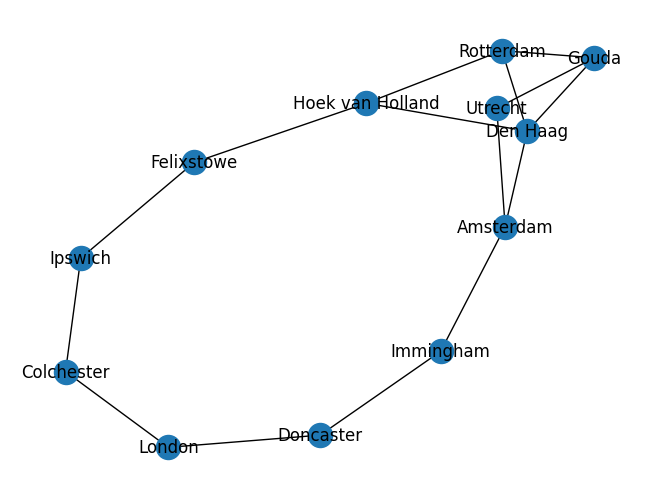

In [7]:
G = nx.from_pandas_edgelist(transport_arcs, source='src', target='dst')
nx.draw(G, with_labels=True)

In [8]:
'''
Ajouter des attributs
Inputs:
    Un graphe,
    un dataframe contenant les données,
    nom de l'attribut,
    le nom de la colonne index du dataframe
Pas d'output:
Utiilisez la fonction set_node_attributes de networkx

'''
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
    attributs = dict(zip(dfnoeuds[nomIndex], dfnoeuds[nomAttribut]))
    nx.set_node_attributes(myGraphe, attributs, nomAttribut)

In [9]:
ajouterAttribut(G,transport_nodes,'latitude','id')
ajouterAttribut(G,transport_nodes,'longitude','id')
ajouterAttribut(G,transport_nodes,'population','id')

In [10]:
print(G.nodes(data=True))

[('Amsterdam', {'latitude': 52.379189, 'longitude': 4.899431, 'population': 821752}), ('Utrecht', {'latitude': 52.092876, 'longitude': 5.10448, 'population': 334176}), ('Den Haag', {'latitude': 52.078663, 'longitude': 4.288788, 'population': 514861}), ('Rotterdam', {'latitude': 51.9225, 'longitude': 4.47917, 'population': 623652}), ('Immingham', {'latitude': 53.61239, 'longitude': -0.22219, 'population': 9642}), ('Doncaster', {'latitude': 53.52285, 'longitude': -1.13116, 'population': 302400}), ('London', {'latitude': 51.509865, 'longitude': -0.118092, 'population': 8787892}), ('Hoek van Holland', {'latitude': 51.9775, 'longitude': 4.13333, 'population': 9382}), ('Felixstowe', {'latitude': 51.96375, 'longitude': 1.3511, 'population': 23689}), ('Ipswich', {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384}), ('Colchester', {'latitude': 51.88921, 'longitude': 0.90421, 'population': 104390}), ('Gouda', {'latitude': 52.01667, 'longitude': 4.70833, 'population': 70939})]


In [11]:
G.edges

EdgeView([('Amsterdam', 'Utrecht'), ('Amsterdam', 'Den Haag'), ('Amsterdam', 'Immingham'), ('Utrecht', 'Gouda'), ('Den Haag', 'Rotterdam'), ('Den Haag', 'Hoek van Holland'), ('Den Haag', 'Gouda'), ('Rotterdam', 'Gouda'), ('Rotterdam', 'Hoek van Holland'), ('Immingham', 'Doncaster'), ('Doncaster', 'London'), ('London', 'Colchester'), ('Hoek van Holland', 'Felixstowe'), ('Felixstowe', 'Ipswich'), ('Ipswich', 'Colchester')])

### Representer les noeuds sur une carte avec Folium

In [12]:
import folium
'''
On construit le Map avec une location par defaut
'''
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=12,
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='© OpenStreetMap contributors'
)


In [ ]:
basemap

### Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker

In [13]:
for i in G.nodes:
    folium.Marker([G.nodes[i]['latitude'],G.nodes[i]['longitude']],tooltip = 'Population '+str(G.nodes[i]['longitude'])).add_to(basemap)

![Capture%20d%E2%80%99e%CC%81cran%202020-05-16%20a%CC%80%2000.08.31.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202020-05-16%20a%CC%80%2000.08.31.png)

In [14]:
'''
Cette fonction permet de construire une liste de liste comprenant pour chaque
sous-liste ses coordonnées et celles d'un voisin
Ces points peuvent etre utilisés pour représenter les lignes dans la carte
Input: le graphe
Output: Une liste de couples representant les longitudes et latitudes d'un point et d'un de ses voisins
'''
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.nodes:

        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.nodes[i]["latitude"],myGraphe.nodes[i]["longitude"]])
            S.append([myGraphe.nodes[neighbor]["latitude"],myGraphe.nodes[neighbor]["longitude"]])
            points.append(S)
    return points



In [15]:
coordonneesvoisins = construirePointsImage(G)

### TODO: Visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes

In [16]:
'''
A faire
Permet de visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes
Prend en entrée:
- un graphe
- les coordonnées entre chaque point et ses voisins calculées avec la fonction ci-dessus
- Une location par defaut
- Un paramétrage de folium
Output: la carte
'''
def visualiserFolium(myGraphe, points, locationpardefaut=[52.3791890, 4.899431], tiles='OpenStreetMap'):
    # Créer une carte Folium
    m = folium.Map(location=locationpardefaut, zoom_start=8, tiles=tiles,attr='© OpenStreetMap contributors')

    # Ajouter les points (noeuds)
    for node, data in myGraphe.nodes(data=True):
        if 'latitude' in data and 'longitude' in data:
            folium.Marker(
                location=[data['latitude'], data['longitude']],
                popup=node,
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(m)

    # Ajouter les arêtes (edges sous forme de lignes)
    for u, v in myGraphe.edges():
        if u in points and v in points:
            point1 = points[u]
            point2 = points[v]
            folium.PolyLine(
                locations=[point1, point2],
                color='red',
                weight=2
            ).add_to(m)

    return m

In [17]:
visualiserFolium(G,coordonneesvoisins)

### Partie 2
* Dans cette partie vous allez implémenter des ADT: Noeud, Graphe, File, Pile



#### Implementer la classe Noeud
* Un noeud a un nom
* Un noeud a des attributs sous forme de dictionnaire pyton avec comme cle:
    une liste de coordonnes ( latitude, longitude)
    
    la taille de la population
* La liste des voisins sera initialisée à la création des arcs dans le graphe
*  Vous ajouterez toutes les methodes nécessaires
        
    
        

In [18]:
class Noeud:
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []

    def setAttribut(self,key, values):
        self.attributs[key] = values

    def getAttribut(self,key):
        return self.attributs[key]

    def getName(self):
        return self.name
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        return isinstance(noeud, Noeud) and self.name == noeud.name

#### Implementer la classe Graphe
* Les noeuds des graphes doivent être initialisé à l'aide du fichier
transport-node.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* Les arcs des graphes doivent être initialisé à l'aide du fichier
transport-relations.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* On doit pouvoir retrouver les coordonnées d'un noeud grâce à son nom
* On doit avoir la liste des noeuds voisins d'un noeud donné. Le graphe est non orienté donc le voisinage est reciproque
        

In [19]:
class Graphe:
    '''
    Les noeuds seront mis dans une liste
    Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    '''
    Creer les neouds avec un fichier csv
    On peut mettre tous les noeuds dans une liste
    On doit attribuer à chaque noeud ses attributs: latitude, longitude, population
    On initialise le dictionnaire des arcs en creant la cle avec le nom du noeud et la valeur avec une liste vide
    N'oubliez pas de gerer les exceptions
    '''
    def creerNoeuds(self,fichiernoeuds):
        with open(fichiernoeuds, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                node_name = row['id']
                latitude = float(row['latitude'])
                longitude=float(row['longitude'])
                population=int(row['population'])
                node = Noeud(node_name)
                node.setAttribut('coordonnees', (latitude, longitude))
                node.setAttribut('population', population)
                self.noeuds.append(node)

    '''
    - Creer les arcs avec un  fichier csv
    - Utilisez un dictionnaire pour les arcs
    - N'oubliez pas que le graphe est non oriente.
    - Pour chaque noeud on mettra des tuples dans la liste de ses voisins: (nom du voisin, cout du chemin)
    - Gerer les exceptions
    '''
    def creerArc(self, fichierarcs):
        with open(fichierarcs, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                src = row['src']
                dst = row['dst']
                cost = float(row['cost']) if 'cost' in row else 1.0  # Si le coût existe sinon 1.0 par défaut

                # Vérifier que src et dst existent dans le graphe
                if src not in self.arcs:
                   self.arcs[src] = []
                if dst not in self.arcs:
                    self.arcs[dst] = []

                # Ajouter les voisins (non orienté = deux sens)
                self.arcs[src].append((dst, cost))
                self.arcs[dst].append((src, cost))
    '''
    Retrouver un noeud à partir de son nom
    '''
    def getNoeud(self,name):
        for noeud in self.noeuds:
            if noeud.getName() == name:
                return noeud
        return None
    '''
    Trouver les noeuds voisins d'un noeud donne
    '''
    def getVoisins(self,noeud):
        return self.arcs.get(noeud.getName(), [])

    '''
    Recuperer pour un noeud donne les latitudes et longitudes de ses voisins
    Constituer des pairs de listes de coordonnées entre le point et ses voisins
    pour une representation sous folium

    '''
    def getCoordonnesVoisins(self, noeud):
        listecoord = []
        # voise est un tuple et je veux recuperer le nom du noeud voisin
        # qui est le premier lement du tuple

        for voise in self.getVoisins(noeud):
            # Recupere un noeud voisin
            noeudVoisin = self.getNoeud(voise[0])
            listecoord.append([noeud.getAttribut('coordonnees'),noeudVoisin.getAttribut('coordonnees')])
        return listecoord

    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = []
        for name in listeNoeuds:
            coord.append(self.getNoeud(name).getAttribut('coordonnees'))
        return coord

    '''
    Visualiser les noeuds et les arcs sous folium
    Entree: le parametre explored sera utilisé pour les parcours de graphe
    '''

    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',explored = None ):

        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles,attr='© OpenStreetMap contributors')



        for i in self.noeuds:

            folium.Marker(i.getAttribut('coordonnees'),tooltip = 'Population '+str(i.getAttribut('population'))).add_to(basemap)
            locations = self.getCoordonnesVoisins(i)
            if len(locations)!= 0:
                folium.PolyLine(self.getCoordonnesVoisins(i), color="red", weight=2.5, opacity=1).add_to(basemap)
        if explored != None:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [20]:
G = Graphe()
G.creerNoeuds('/content/transport-nodes.csv')

In [21]:
G.creerArc('/content/transport-relationships.csv')

In [22]:
G.visualiserFolium()

### Partie 3
* Implementer les classes File et Pile en utilisant les list en python
* Quelques liens interessants:
https://openclassrooms.com/fr/courses/900279-apprenez-a-programmer-avec-ada/2144666-les-types-abstraits-de-donnees-listes-files-piles

https://fr.wikipedia.org/wiki/Type_abstrait

http://www.csi.uottawa.ca/~flocchin/CSI2510/CSI2510PileFile.pdf



In [27]:


class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
        self.elements.append(noeud)
    '''
    Retourne True si  un noeud est dans la pile
    '''

    def contains_noeud(self, name):

        for noeud in self.elements:
            if noeud.getName() == name:
                return True
        return False

    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        return len(self.elements) == 0
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        if self.empty():
            raise Exception("La pile est vide")
        return self.elements.pop()




In [28]:

class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File.
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''
    def remove(self):
        if self.empty():
            raise Exception("La fille est vide")
        return self.elements.pop(0)

### Partie 3
* Implementer les algorithmes de parcours de graphe: BFS ET DFS
* Algorithme BFS et DFS
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
Les deux parcours utilisent le même algorithme mais différent suivant la structure de données utilisée comme frontiére. La frontiére est une structure de données qui permet manipuler les noeuds intermediaires.
#### Algorithme
* On met le noeud source dans la frontiére
* On cree une structure vide devant contenir les noeuds explorés
* Repeter
    * Si la frontiere est vide pas de solution
    * Prendre un noeud dans la frontiere ( idée de suppression)
    * Si le noeud est le noeud destination alors solution
    * Sinon:
        * Mettre le noeud dans l'ensemble des noeuds deja explorés
        * Ajouter les voisins dans la frontiére s'ils ne sont pas dans la frontiere et s'ils ne sont pas deja explores



In [29]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source

        frontiere = Pile()
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = set()

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            num_explored += 1

            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):

                # Ajouter le aux noeuds deja explorés
                explored.add(noeudDST.name)

                return explored, num_explored

            # Marquer le noeud comme explore
            explored.add(node.getName())

            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):

                if not frontiere.contains_noeud(n[0]) and n[0] not in explored:
                    voisin = myGraphe.getNoeud(n[0])
                    frontiere.push(voisin)

In [30]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[0],G.noeuds[1])[0]))

In [61]:
# #### TODO: Implementer le parcours en profondeur recursif et calculer le coût du chemin
# def parcoursRecDFS(myGraphe,noeudSRC,noeudDST, marques, chemin,cout_actuel):
#     """
#     Fonction récursive pour explorer le graphe depuis s jusqu'à dest.
#     - noeudDST : graphe objet avec getVoisins() et getNoeud()
#     - noeudSRC : nom du nœud courant
#     - dest : nom du nœud destination
#     - marques : ensemble des nœuds déjà visités
#     - chemin : liste représentant le chemin suivi
#     """
#     marques.add(noeudSRC)
#     chemin.append(noeudSRC)

#     if noeudSRC == noeudDST:
#         return True, cout_actuel  # Destination atteinte

#     for voisin, poids in G.getVoisins(G.getNoeud(noeudSRC)):
#         if voisin not in marques:
#             trouve, cout_total = parcoursRecDFS(G, voisin, noeudDST, marques, chemin, cout_actuel + poids)
#             if trouve:
#                 return True, cout_total

#     chemin.pop()  # backtracking
#     return False, cout_actuel  # Aucun chemin trouvé depuis ce nœud

# def parcoursProfondeurRec(myGraphe, source, destination):
#     """
#     DFS récursif entre source et destination avec chemin + coût.
#     """
#     marques = set()
#     chemin = []

#     trouve, cout_total = parcoursRecDFS(G, source, destination, marques, chemin, 0)

#     if trouve:
#         return chemin, cout_total
#     else:
#         return None, None
def explorerRECDFS(myGraphe, noeudSRC, marques, chemin, cout_actuel):
    """
    Explore récursivement tout le graphe depuis un nœud donné.
    Calcule aussi le coût total des arêtes traversées.
    """
    marques.add(noeudSRC)
    chemin.append(noeudSRC)

    for voisin, poids in myGraphe.getVoisins(myGraphe.getNoeud(noeudSRC)):
        if voisin not in marques:
            cout_actuel = explorerRECDFS(myGraphe, voisin, marques, chemin, cout_actuel + poids)

    return cout_actuel


def parcoursRecDFSComplet(myGraphe):
    """
    Parcours DFS complet du graphe (tous les sommets).
    Retourne le chemin global et le coût total.
    """
    marques = set()
    chemin = []
    cout_total = 0
    for noeud in myGraphe.noeuds:
        nom = noeud.getName()
        if nom not in marques:
            cout_total = explorerRECDFS(myGraphe, nom, marques, chemin, cout_total)
    return chemin, cout_total

In [63]:
from ctypes import ArgumentError
chemin, cout = parcoursRecDFSComplet(G)
print("Chemin trouvé :", chemin)
print("Coût total :", cout)

Chemin trouvé : ['Amsterdam', 'Utrecht', 'Gouda', 'Rotterdam', 'Den Haag', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'London', 'Doncaster', 'Immingham']
Coût total : 877.0


In [64]:
#### TODO: Implementer le parcours BFS et calculer le coût du chemin
from collections import deque

def parcoursLargeur(myGraphe, noeudSRC):
    """
    Parcours en largeur (BFS) à partir d’un sommet source.
    Retourne le chemin d'exploration et le coût total.
    """
    file = deque()
    marques = set()
    chemin = []
    cout_total = 0

    file.append(noeudSRC)
    marques.add(noeudSRC)

    while file:
        noeud_courant = file.popleft()
        chemin.append(noeud_courant)

        for voisin, poids in myGraphe.getVoisins(myGraphe.getNoeud(noeud_courant)):
            if voisin not in marques:
                marques.add(voisin)
                file.append(voisin)
                cout_total += poids

    return chemin, cout_total


In [67]:
chemin, cout = parcoursLargeur(G, "Amsterdam")
print("Chemin exploré :", chemin)
print("Coût total :", cout)


Chemin exploré : ['Amsterdam', 'Utrecht', 'Den Haag', 'Immingham', 'Gouda', 'Rotterdam', 'Hoek van Holland', 'Doncaster', 'Felixstowe', 'London', 'Ipswich', 'Colchester']
Coût total : 1248.0


In [68]:
'''
Implémenter le parcours en largeur non entre deux noeuds
'''

def parcoursBFS(myGraphe, noeudSRC, noeudDST):
    """Trouver un parcours BFS entre noeudSRC et noeudDST"""

    # Le nombre de noeuds explorés
    num_explored = 0

    # Initialisation de la frontière avec une file (FIFO)
    frontiere = File()
    frontiere.push(noeudSRC)

    # Initialisation de la liste des noeuds explorés
    explored = set()

    while True:
        if frontiere.empty():
            raise Exception("no solution")

        # Prendre un noeud à explorer depuis la file
        node = frontiere.remove()
        num_explored += 1

        # Si c'est le noeud destination
        if node.egal(noeudDST):
            explored.add(noeudDST.getName())
            return explored, num_explored

        # Marquer comme exploré
        explored.add(node.getName())

        # Ajouter tous les voisins dans la file
        for n in myGraphe.getVoisins(node):
            voisin_name = n[0]
            voisin = myGraphe.getNoeud(voisin_name)

            if not frontiere.contains_noeud(voisin_name) and voisin_name not in explored:
                frontiere.push(voisin)



In [69]:
G.visualiserFolium(explored = list(parcoursBFS(G,G.noeuds[0],G.noeuds[1])[0]))

### Partie 4
* Implementer les algorithmes A star où le choix se portera sur le voisin ayant le plus petit coût



#### TODO: Implementer le parcours avec l'algorithme du Greedy Best First Search. Vous calculerez les coûts de chape noeud par rapport
au noeud destination

#### TODO: Implementer le parcours avec l'algorithme du A*. Vous calculerez les coûts de chape noeud par rapport
au noeud destination et au noeud origine

https://www.mygreatlearning.com/blog/best-first-search-bfs/

# Greedy Best-First Search (GBFS)
 utilise uniquement une fonction heuristique h(n) pour estimer la distance directe entre le nœud actuel et l'objectif. Priorise les nœuds qui semblent les plus proches de l'objectif.

In [71]:
import heapq

def greedy_best_first_search(graphe, start, goal):
    frontier = []
    heapq.heappush(frontier, (heuristic(start, goal), start))
    came_from = {start.getName(): None}
    visited = set()

    while frontier:
        _, current = heapq.heappop(frontier)
        current_name = current.getName()

        if current_name == goal.getName():
            return reconstruct_path(came_from, start, goal)

        visited.add(current_name)

        for neighbor_name, _ in graphe.getVoisins(current):
            if neighbor_name not in visited:
                neighbor = graphe.getNoeud(neighbor_name)
                heapq.heappush(frontier, (heuristic(neighbor, goal), neighbor))
                if neighbor_name not in came_from:
                    came_from[neighbor_name] = current_name

    return None  # Aucun chemin trouvé


In [70]:
import math

def heuristic(n1, n2):
    lat1, lon1 = n1.getAttribut('coordonnees')
    lat2, lon2 = n2.getAttribut('coordonnees')
    return math.hypot(lat2 - lat1, lon2 - lon1)


In [72]:
def reconstruct_path(came_from, start, goal):
    current = goal.getName()
    path = [current]
    while current != start.getName():
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


In [73]:
start = G.getNoeud("Amsterdam")
goal = G.getNoeud("Rotterdam")

path_greedy = greedy_best_first_search(G, start, goal)
print("Chemin trouvé (Greedy BFS) :", path_greedy)

# Visualiser sur Folium
G.visualiserFolium(explored=path_greedy)


Chemin trouvé (Greedy BFS) : ['Amsterdam', 'Den Haag', 'Rotterdam']


# A*
combine la fonction heuristique h(n) avec le coût de déplacement réel g(n) dès le départ. La fonction d'évaluation 𝑓(𝑛)=𝑔(𝑛)+ℎ(𝑛) équilibre la distance directe et le coût de déplacement pour une recherche de chemin optimale.

In [74]:
import heapq

def a_star_search(graphe, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {start.getName(): None}
    cost_so_far = {start.getName(): 0}

    while frontier:
        _, current = heapq.heappop(frontier)
        current_name = current.getName()

        if current_name == goal.getName():
            return reconstruct_path(came_from, start, goal)

        for neighbor_name, cost in graphe.getVoisins(current):
            new_cost = cost_so_far[current_name] + cost
            if neighbor_name not in cost_so_far or new_cost < cost_so_far[neighbor_name]:
                cost_so_far[neighbor_name] = new_cost
                neighbor = graphe.getNoeud(neighbor_name)
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor_name] = current_name

    return None  # Aucun chemin trouvé


In [77]:
start = G.getNoeud("London")
goal = G.getNoeud("Utrecht")

path_astar = a_star_search(G, start, goal)
print("Chemin trouvé (A*) :", path_astar)

# Visualiser sur Folium
G.visualiserFolium(explored=path_astar)


Chemin trouvé (A*) : ['London', 'Colchester', 'Ipswich', 'Felixstowe', 'Hoek van Holland', 'Rotterdam', 'Gouda', 'Utrecht']
